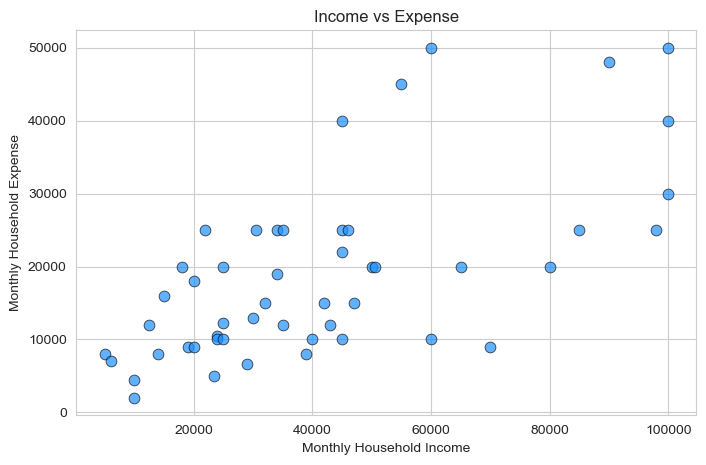

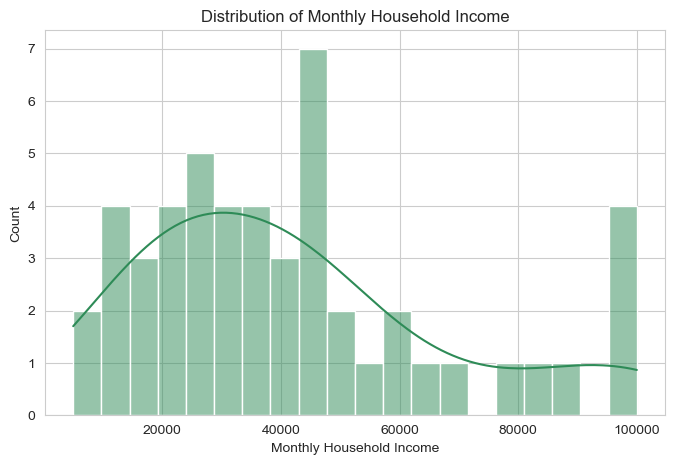

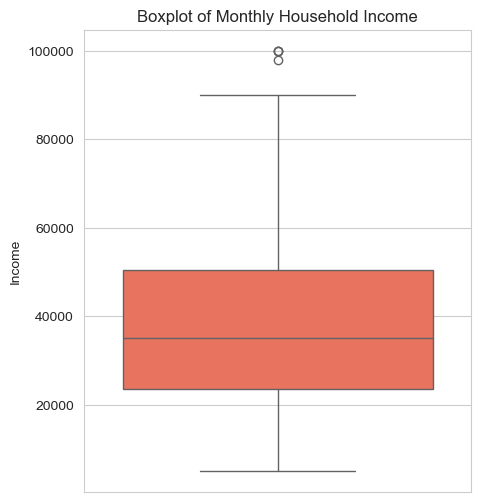


=== Income-Expenditure Descriptive Summary ===
       Mthly_HH_Income  Mthly_HH_Expense  No_of_Fly_Members  \
count        50.000000         50.000000          50.000000   
mean      41558.000000      18818.000000           4.060000   
std       26097.908979      12090.216824           1.517382   
min        5000.000000       2000.000000           1.000000   
25%       23550.000000      10000.000000           3.000000   
50%       35000.000000      15500.000000           4.000000   
75%       50375.000000      25000.000000           5.000000   
max      100000.000000      50000.000000           7.000000   

       No_of_Earning_Members  Emi_or_Rent_Amt  Annual_HH_Income  
count              50.000000        50.000000      5.000000e+01  
mean                1.460000      3060.000000      4.900190e+05  
std                 0.734291      6241.434948      3.201358e+05  
min                 1.000000         0.000000      6.420000e+04  
25%                 1.000000         0.000000      2.5

In [14]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import skew, kurtosis
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.rcParams.update({"figure.dpi": 100})

inc = pd.read_csv("Inc_Exp_Data.csv")

col_income = "Mthly_HH_Income"
col_expense = "Mthly_HH_Expense"
col_family = "No_of_Fly_Members"
col_earners = "No_of_Earning_Members"
col_emi = "Emi_or_Rent_Amt"
col_annual = "Annual_HH_Income"

for c in [col_income, col_expense, col_family, col_earners, col_emi, col_annual]:
    if c in inc.columns:
        inc[c] = pd.to_numeric(inc[c], errors="coerce")

inc_mean = inc[col_income].mean()
inc_median = inc[col_income].median()
inc_mode = list(inc[col_income].mode().values)

exp_mean = inc[col_expense].mean()
exp_median = inc[col_expense].median()

inc_range = inc[col_income].max() - inc[col_income].min()
exp_range = inc[col_expense].max() - inc[col_expense].min()

inc["Income_to_Expense"] = inc[col_income] / inc[col_expense].replace({0: np.nan})
max_ratio_row = inc.loc[inc["Income_to_Expense"].idxmax()]

avg_family = inc[col_family].mean()
std_family = inc[col_family].std(ddof=1)
cv_family = std_family / avg_family if avg_family else np.nan

inc["Dependency_Ratio"] = (inc[col_family] - inc[col_earners]) / inc[col_family]
max_dep_row = inc.loc[inc["Dependency_Ratio"].idxmax()]

inc["EMI_as_%Income"] = (inc[col_emi] / inc[col_income]) * 100
avg_pct_emi = inc["EMI_as_%Income"].mean()
high_emi_df = inc[inc["EMI_as_%Income"] > 40]

inc["Disposable"] = inc[col_income] - inc[col_expense] - inc[col_emi]
min_disp_row = inc.loc[inc["Disposable"].idxmin()]

corr_income_expense = inc[col_income].corr(inc[col_expense])
corr_earners_income = inc[col_earners].corr(inc[col_income])

skew_income = skew(inc[col_income].dropna())
kurt_income = kurtosis(inc[col_income].dropna())
skew_exp = skew(inc[col_expense].dropna())
kurt_exp = kurtosis(inc[col_expense].dropna())

inc["Income_Z"] = stats.zscore(inc[col_income].fillna(inc[col_income].mean()))
outliers_df = inc.loc[inc["Income_Z"].abs() > 3, [col_income, "Income_Z"]]

plt.figure(figsize=(8,5))
sns.scatterplot(data=inc, x=col_income, y=col_expense,
                color="dodgerblue", s=60, alpha=0.7, edgecolor="k")
plt.title("Income vs Expense")
plt.xlabel("Monthly Household Income")
plt.ylabel("Monthly Household Expense")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(inc[col_income].dropna(), bins=20, kde=True, color="seagreen")
plt.title("Distribution of Monthly Household Income")
plt.xlabel("Monthly Household Income")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(5,6))
sns.boxplot(y=inc[col_income].dropna(), color="tomato")
plt.title("Boxplot of Monthly Household Income")
plt.ylabel("Income")
plt.show()

print("\n=== Income-Expenditure Descriptive Summary ===")
numeric_cols = [c for c in [col_income, col_expense, col_family, col_earners, col_emi, col_annual] if c in inc.columns]
print(inc[numeric_cols].describe())

print("\nIncome Mean:", inc_mean)
print("Income Median:", inc_median)
print("Income Mode(s):", inc_mode)
print("Expense Mean:", exp_mean)
print("Expense Median:", exp_median)
print("Income Range:", inc_range)
print("Expense Range:", exp_range)

print("\nCorrelation (Income vs Expense):", corr_income_expense)
print("Correlation (Earners vs Income):", corr_earners_income)

print("\nAverage Family Members:", avg_family)
print("Std Dev Family Members:", std_family)
print("CV Family Members:", cv_family)

print("\nAverage EMI % of Income:", avg_pct_emi)

print("\nHousehold with Max Income/Expense Ratio:\n", max_ratio_row)
print("\nHousehold with Max Dependency Ratio:\n", max_dep_row)
print("\nHousehold with Min Disposable Income:\n", min_disp_row)

if not high_emi_df.empty:
    print("\nHouseholds with EMI > 40%:\n", high_emi_df.head())

if not outliers_df.empty:
    print("\nOutliers in Income (|z|>3):\n", outliers_df)

print("\nSkewness & Kurtosis:")
print("Income - Skewness:", skew_income, " | Kurtosis:", kurt_income)
print("Expense - Skewness:", skew_exp, " | Kurtosis:", kurt_exp)
